In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

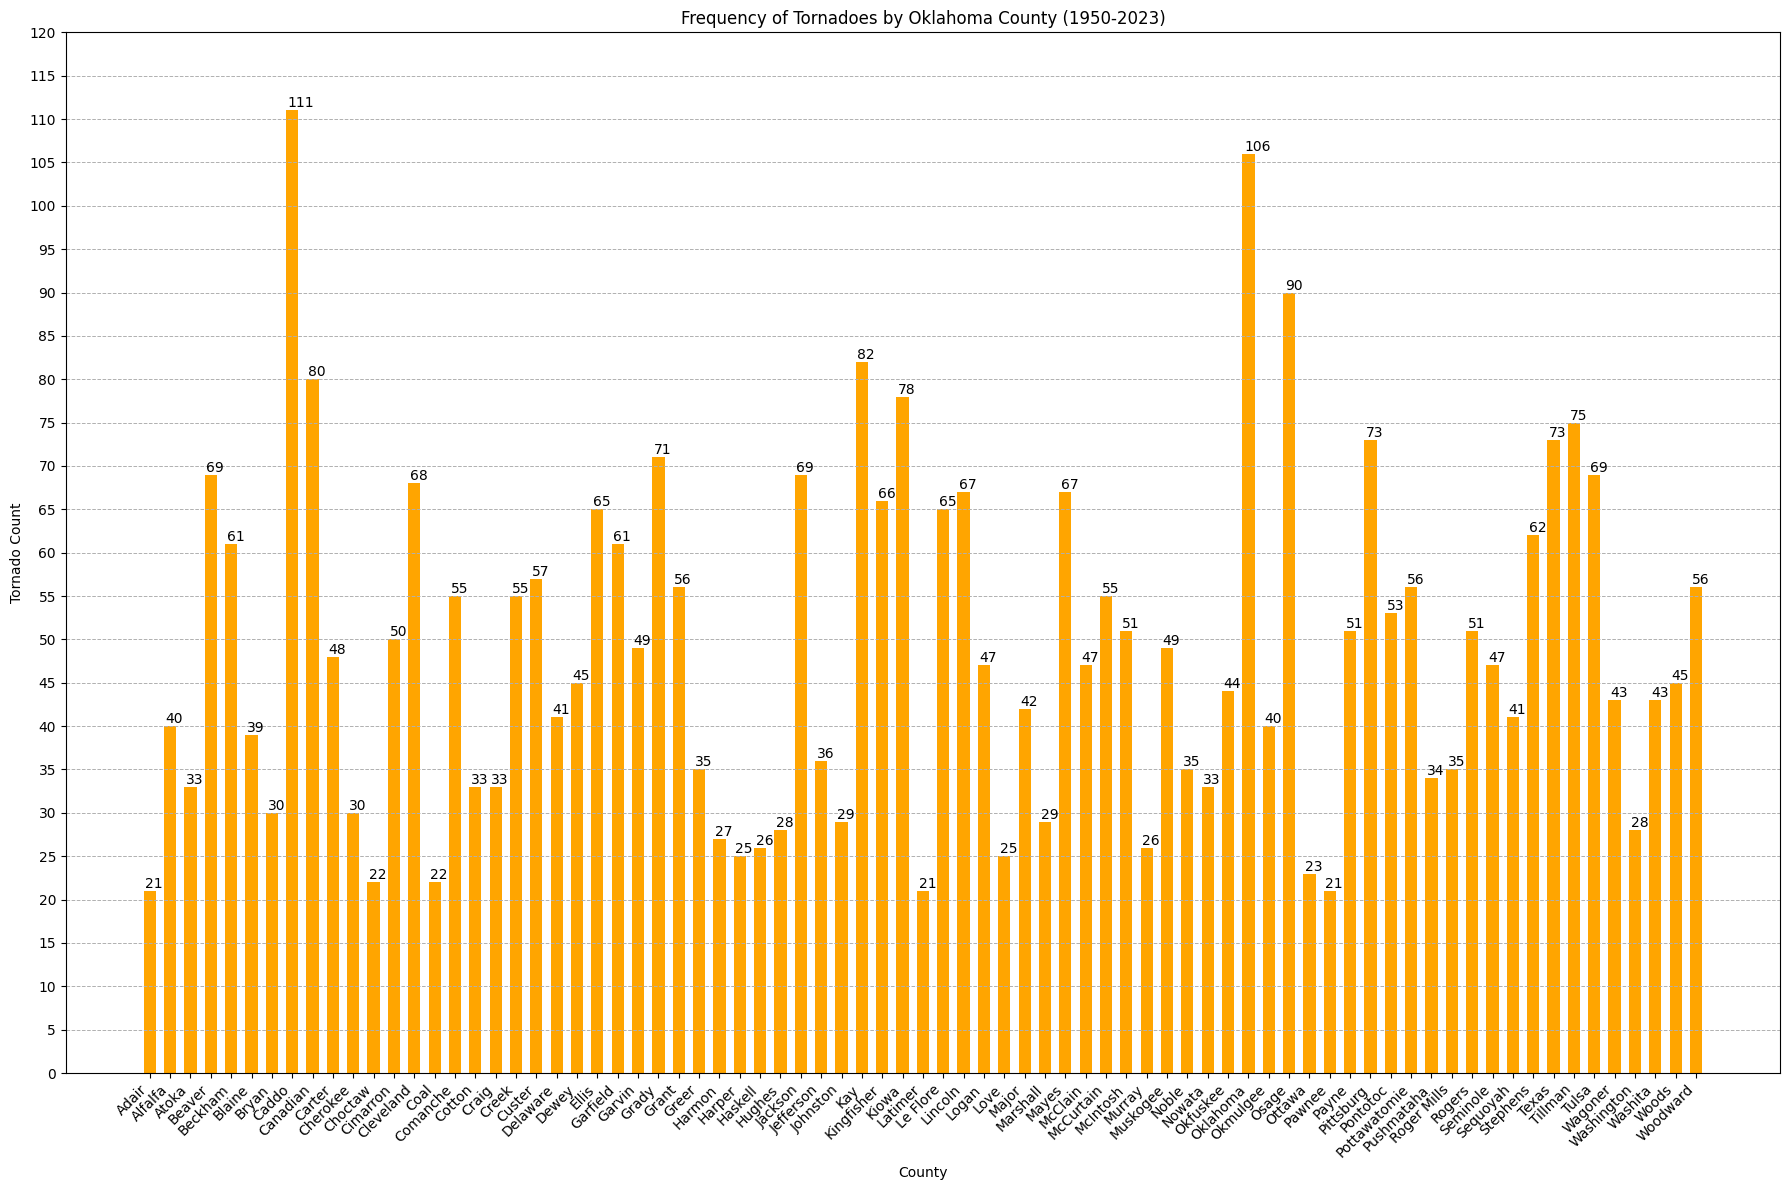

In [24]:
# Code for Graph of Oklahoma tornado incidence by county (+ by size)
# Import county dataset
tornado_county = pd.read_csv('Oklahoma County Tornado Incidence.csv')

# Code for bar chart
plt.figure(figsize=(18, 12))
bars = plt.bar(tornado_county['County'], tornado_county['Count'], color='orange', width=0.6)

# Adding the exact count number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/7, yval, int(yval), va='bottom')

# Adding labels and title
plt.xlabel('County')
plt.ylabel('Tornado Count')
plt.title('Frequency of Tornadoes by Oklahoma County (1950-2023)')

# Adding more intervals on the y-axis
plt.yticks(range(0, tornado_county['Count'].max() + 10, 5))

# Adding grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Saving the plot as a JPG file
plt.savefig('FreqTornOKCounty.jpg', format='jpg', dpi=400)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/sm/6g7mj2990c7dbly9qz2ghm6r0000gn/T/ipykernel_3314/1469080271.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  fujita_perc = fujita_perc.apply(pd.to_numeric, errors='ignore')


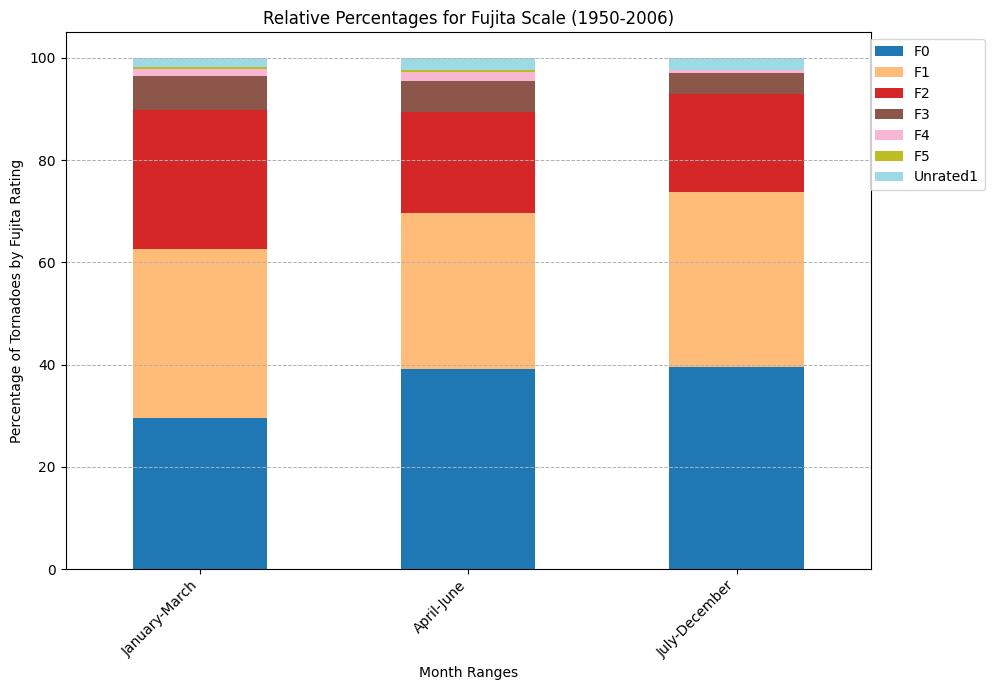

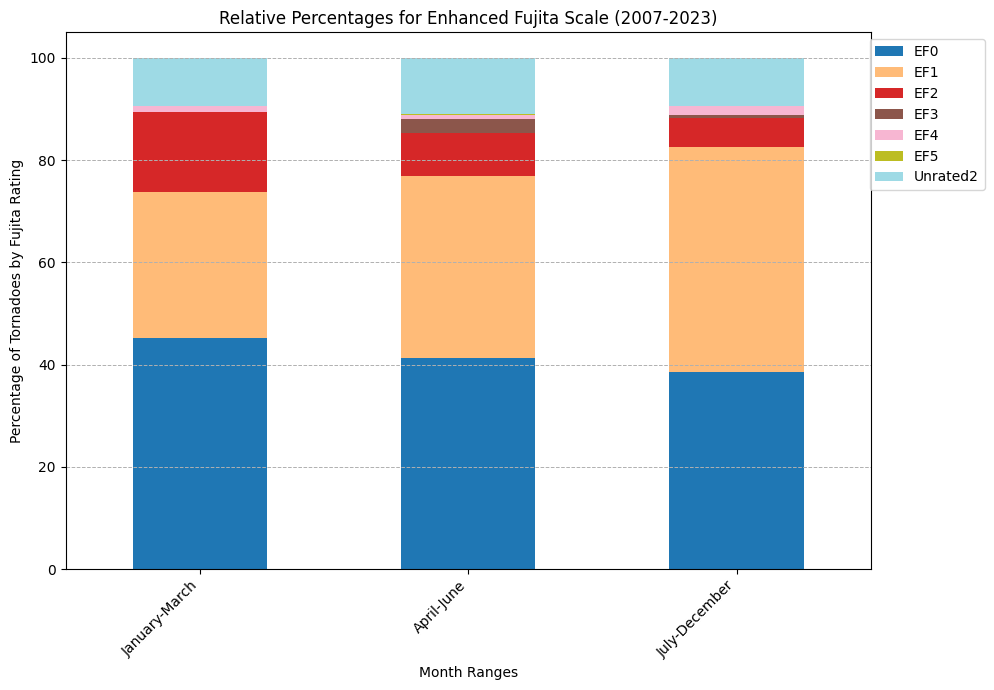

In [36]:
# Code for Fujita scale percentage bar charts 
# Import Fujita scale percentage dataset
fujita_perc = pd.read_csv('F-Scale_Percentages 2.csv')

# Clean the data by setting appropriate headers
fujita_perc.columns = fujita_perc.iloc[0]
fujita_perc = fujita_perc[1:]
fujita_perc.reset_index(drop=True, inplace=True)

# Convert data to numeric where possible
fujita_perc = fujita_perc.apply(pd.to_numeric, errors='ignore')

# Separate the data for the two sets of rows: pre + post Enhanced Fujita periods
first_set = fujita_perc.iloc[0:3, 1:8]  
second_set = fujita_perc.iloc[3:7, 8:15]  

# Function to calculate percentages
def calculate_percentages(df):
    return df.div(df.sum(axis=1), axis=0) * 100

# Calculate percentages for both periods by month range
first_set_percentages = calculate_percentages(first_set)
second_set_percentages = calculate_percentages(second_set)

# X-axis labels
first_set_labels = ['January-March', 'April-June', 'July-December']
second_set_labels = ['January-March', 'April-June', 'July-December']

# Plotting function
def plot_bar_chart(df, title, labels, filename):
    ax = df.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')
    plt.title(title)
    plt.ylabel('Percentage of Tornadoes by Fujita Rating')
    plt.xlabel('Month Ranges')
    plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.savefig(filename, format='jpg', dpi=400)
    plt.show()

# Plot the bar charts
plot_bar_chart(first_set_percentages, 'Relative Percentages for Fujita Scale (1950-2006)', first_set_labels, 'Fujita Scale Percentages.jpg')
plot_bar_chart(second_set_percentages, 'Relative Percentages for Enhanced Fujita Scale (2007-2023)', second_set_labels, 'Enhanced Fujita Scale Percentages.jpg')
